In [2]:
import pandas as pd

salary = pd.read_csv(r'C:\Users\nadys\.cache\kagglehub\datasets\kasiviswanath00\polynomial-regression\versions\1\rank_salary.csv')

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

X = salary['Level'].to_numpy().reshape(-1, 1)
y = salary['Salary'].to_numpy().reshape(-1, 1)

y_st = StandardScaler().fit_transform(y)
X_st = StandardScaler().fit_transform(X)

# X = salary['Level'].to_numpy().reshape(-1, 1)
# y = salary['Salary'].to_numpy()

poly = PolynomialFeatures(degree = 4)

X_poly = poly.fit_transform(X_st)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y_st, test_size=0.2, random_state=10)

model = Ridge(alpha=1).fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_train = model.predict(X_train)

print(f'MSE_test: {mean_squared_error(y_test, y_pred)}')
print(f'MSE_train: {mean_squared_error(y_train, y_pred_train)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE_test: 0.008140761113622047
MSE_train: 0.0018787596977492156
R2: 0.9864328076831145


<Axes: >

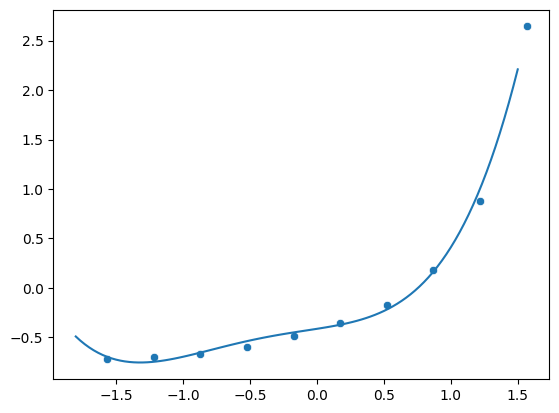

In [4]:
import seaborn as sns
import numpy as np

sns.scatterplot(x=X_st.ravel(), y=y_st.ravel())

l = np.linspace(-1.8, 1.5, 100).reshape(-1, 1)
X_new_poly = poly.transform(l)
y_new = model.predict(X_new_poly)

sns.lineplot(x=l.ravel(), y=y_new.ravel())


In [5]:
salary.head()

,Position,Level,Salary
0,Teaching Assistants,1,45000
1,Guest Faculty,2,50000
2,Contractual Faculty,3,60000
3,Assistant Professor,4,80000
4,Associate Professor,5,110000
